# Kaggle advices

## Features and values

0. **Create version system for your runs** Each run must be internally versioned like v.X.Y.Z - (major version).(FE version).(model version). This will help you to keep track of your projects/features/models and decide what works and what not.

1. **Feature scale has an impact on non-tree based models**. It doesn’t affect the logical models like Decision Trees, Random Forests, CART, Boosting Algorithms on Decision Trees, etc. So, when we work with linear models, KNN, NN, we should scale (MinMaxScaler, StandardScaler, etc.) all numeric features. We also can change scale for some features, if we think that they are important to us.

2. **MinMax Scaling decreases variance** while **Standard Scaling makes zero mean**. So use SS when you are interested in the components that maximize the variance (PCA) or if you have a small multilayer NN with tanh activation function and weights initialized near zero. Anyway, if in doubt, use Standard Scale, it won’t hurt! However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, **typical neural network algorithm require data that are on a 0-1 scale**. These transformations are mostly innocuous and are typically needed when the model requires the predictors to be in common units. For example, when the distance or dot products between predictors are used (such as K-nearest neighbors or support vector machines) or when the variables are required to be a a common scale in order to apply a penalty (e.g., the lasso or ridge regression), a standardization procedure is essential.

3. To cope with **outliers** problem, use clipping (another name in the financial sector is **winsorization**). Best way to do in is using of **AdjustedScaler** from library **adjdatatools**. It adjusts outlier borders according to distribution type and symmetry => only 0.7% of outliers are deleted regardless of distribution type.

4. Another solution to the **outliers** problem is rank transformation. Rank transformation sorts all elements according to their rank. That’s why it may cope with the outliers, because numbers like [-100, 1, 5] will be transformed to [1, 2, 3]. Use **scipy.stats.rankdata** for ranking. You need to store mapping of train data and its ranking, or you can concatenate train and test data before ranking. 

5. Also you can use **log transformation** and **square root** for outliers problem, because these transformations make feature values closer to each other, it diminishes their scale. These transformations can significantly improve the result of NN.

6. **MinMaxScaler**, **StandardScaler** are not useful for outlier problems, because they don’t change relative distance between outliers and other features.

7. **Decision Tree based models have difficulties with multiplication and division dependencies**, so, if you can, multiply and divide some necessary features to help DT models find these dependencies. E.g. divide the price of the house by its area and get the price for 1 m^2.

8. If you work with prices, use **fractional feature generation**, when you add a new feature, which represents a fractional part of the price, e.g 2.49 => 0.49. This feature can help the model utilize the differences in people's perception of these prices.

9. Use **sklearn.preprocessing.LabelEncoder** to encode categorical values to numerical in alphabetical (sorted) order, e.g.: [S, A, Q] => [2, 1, 3].

10. Use pd.factorize to encode categorical values to numerical in order of their appearance, e.g. if S is the first value met in data, it will be encoded as 1, while A, which is met second in data, will be encoded as 2.

11. Frequency encoding is an encoding which transforms values to their relative frequencies in data. If we have multiple feature categories with the same frequencies, we may apply ranking operations for them. 

12. We can concatenate categorical/ordinal features and one-hot encode them. E.g class 1, class 2 and male/female may be transformed to 1male, 2male, 1female, 2female features with one-hot encoding.

13. Workflow for handling missing data
    - Drop or impute missing data **only if you are sure that NaNs in these data are random and are not missing for some reason**
    - Build histograms, distributions and boxplots to detect outliers and then treat with them like with missing data
    - Check for errors in data cleaning/transformation (duplicated data, amount of null data, different representation of the same data)
    - Use data from additional sources to fill missing values
    - Fill missing values with reasonable estimates computed from the available data (mean, median). This is good for non-tree models, but not for trees
    - We can also calculate mean/median for each category and fill missing values with these estimates for each category
    - Fill missing values with the outliers (-999, -1, etc)
    - Fill missing values with KNN predictions (use Gower’s distance if categorical features are presented or OneHot or anything else)
    - Fill missing values with tree-based model predictions
    - If feature that requires imputation has a strong linear relationship with another features - use linear model
    - If feature that requires imputation has a strong time component, a simple moving average can be used
    - Of course you have to ignore missing values while calculating mean, median and other statistics and other feature generation
    - You can also change missing values which present in the test data but do not present in the train to category, which is not present in the train data. The point is that a model, that didn’t train on that category before will treat it randomly; tree models do not need that
    - You can add a new feature is_null for each feature with missing values
    - You can also add the new feature, that counts the number of NaN’s in a row
    - Tree models can handle NaNs by default
    - If you encode NaNs you should know how the results would be interpreted if that piece of information becomes important to the model

14. https://scikit-learn.org/stable/modules/preprocessing.html - **all scikit-learn instruments for data preprocessing**, including normalization, solving of outliers problem, mapping to Gaussian distribution, discretization, binarization, etc.

15. If you **find mistakes** in data, don’t hurry to correct or drop them. Maybe there is some pattern in those mistakes. Maybe you should add a feature **“is_correct”** which indicates if the data column has a mistake and maybe this would help your model to make a better prediction.

16. **Feature engineering**:
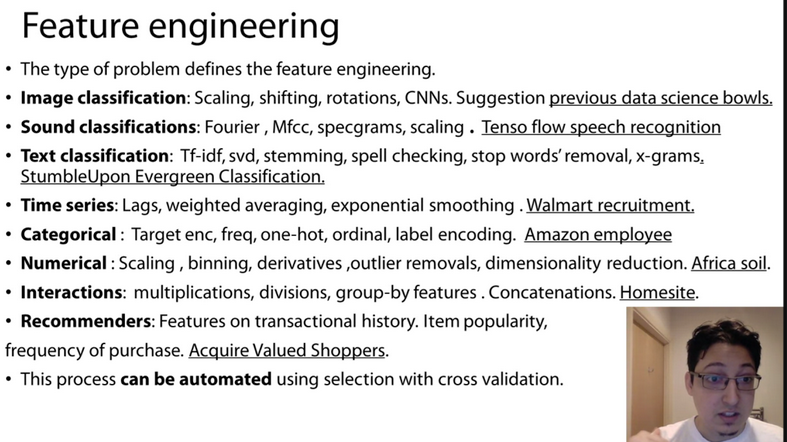

17. Use **Box-Cox transformation** 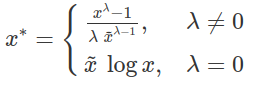. For example log transformation is used for features that increase exponentially (e.g. area house). In case feature is not bounded from below - use  **Yeo-Johnson transformation** which is similar to Box-Cox but suitable for negative values that aren't bounded from below.

18. Use **Logit transformation** 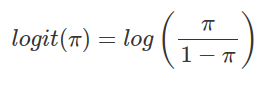 for a variable that has values bounded between zero and one, such as proportions. The problem with modeling this type of outcome is that model predictions might may not be guaranteed to be within the same boundaries. This transformation changes the scale from values between zero and one to values between negative and positive infinity. On the extremes, when the data are absolute zero or one, a small constant can be added or subtracted to avoid division by zero. 

19. Binarization is a dangerous transformation, because it decrease feature informativity and may lead to overfitting and false positive errors. To prevent this, include binarization in the resampling mechanism and check every binarized feature multiple times.

20. **Feature selection** is a process where you select those features in your data that contribute most to the prediction variable or output in which you are interested. 
Why use feature selection?
- some models, notably SVM and NN are sensitive to irrelevant predictors
- other models like linear or logistic regression are vulnerable to correlated predictors; removing correlated predictors will reduce multicollinearity and thus enable these types of models to be fit
- even when a predictive model is insensitive to extra predictors, it makes good scientific sense to include the minimum possible set that provides acceptable results; In some cases, removing predictors can reduce the cost of acquiring data or improve the throughput of the software used to make predictions.

Feature selection dataflow:
- drop all columns with only one not-null value and columns that have more than N% of null values
- build correlation matrix between all columns and result column, drop columns that have high correlation ratio with other columns (more than 0.8-0.9)
- determine numeric features that have low variance (e.g. more than 90% of rows is occupied by one values, value may be different), drop them
- for categorical features:
    - when the target is categorical, the relationship between the feature and target forms a contingency table; when there are three or more levels for the feature, the degree of association between feature and target can be measured with statistics such as chi-squared test; when there are exactly two classes for the feature, the odds-ratio can be an effective choice
    - when the target is numeric, and the categorical feature has two levels, then a basic t-test can be used to generate a statistic; ROC curves and PR curves can also be created for each feature and the AUC can be calculated. When the faeture has more than two levels, the traditional ANOVA F-statistic can be calculated
- for numeric features:
    - when the target is categorical, the same tests can be used in the case above where the feature is categorical and the outcome is numeric; the roles are simply reversed in the t-test, curve calculations and F-test. When there are a large number of tests or if the features have substantial multicollinearity, the correlation-adjusted t-scores of Opgen-Rhein and Strimmer and Zuber and Strimmer are a good alternative to simple ANOVA statistics
    - when the target is numeric, a simple pairwise correlation (or rank correlation) statistic can be calculated; if the relationship is nonlinear, then the MIC values or A-statistics can be used
    - alternatively, a generalized additive model (GAM) can fit nonlinear smooth terms to a set of faetures simultaneously and measure their importance using a p-value that tests against a null hypothesis no trend of each faeture

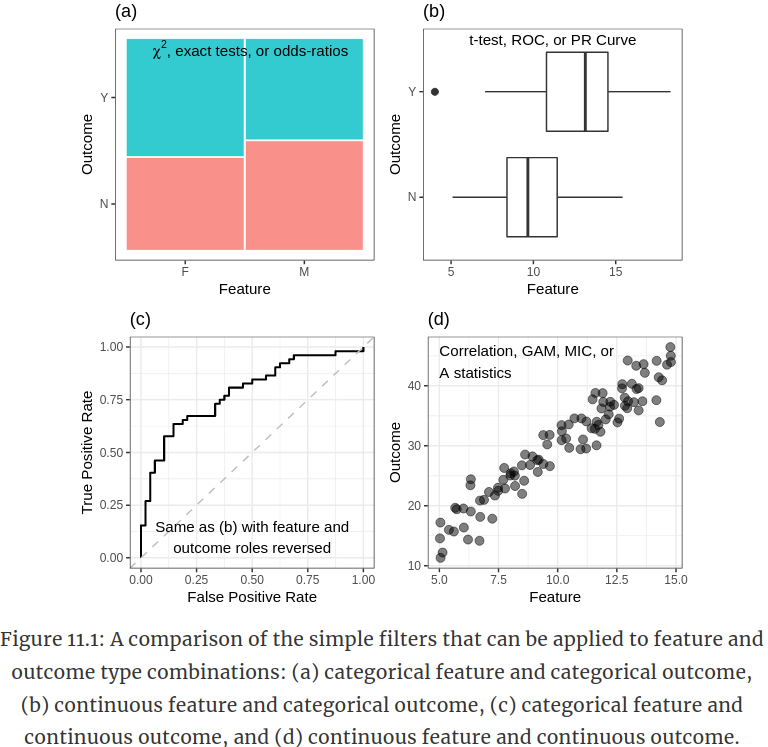

- every preivous test can be replaced by **permutation importance**
- use additional instruments of Feature Selection, you can read about them here [here](https://machinelearningmastery.com/feature-selection-machine-learning-python)  or [here](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection) or [here](http://www.feat.engineering/selection)

# Feature interaction

1. Feature interaction can be:
- additive - the interaction between x1 and x2 is not useful for explaining variation of the target
- antagonistic - the interaction between x1 and x2 is meaningfully negative while x1 and x2 alone also affect the response
- synergystic - the interaction between x1 and x2 is meaningfully positive while x1 and x2 alone also affect the response
- atypical - the interaction between x1 and x2 is significantly different from zero, but either one or both of x1 or x2 do not affect the response

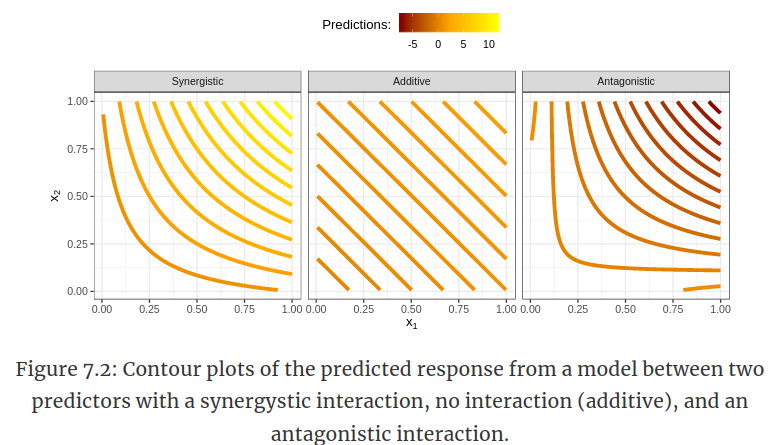   

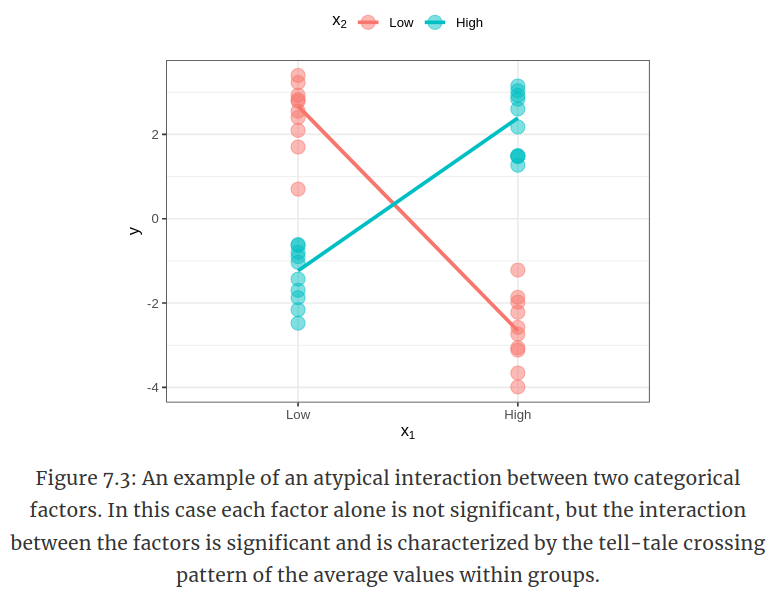

2. Feature interaction pricnciples:
- hierarchy principle - the higher degree of the interaction, the less likely the interaction will explain variation in the response
- effect sparsity - only a fraction of the possible effects truly explain a significant amount of response variation

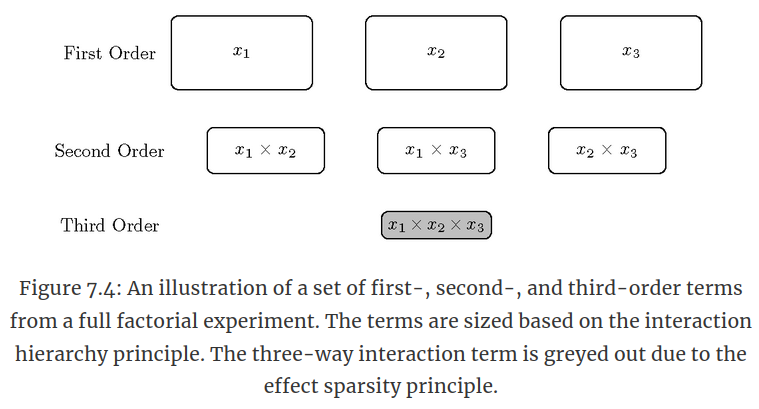

- heredity principle - interaction terms may only be considered if the ordered terms preceding the interaction are effective at explaining response variation. For example on picture below interactions x1-x2 and x1-x3 are considered because feature x1 is meaningful, while x2-x3 is not because neither x2 nor x3 are meaningful

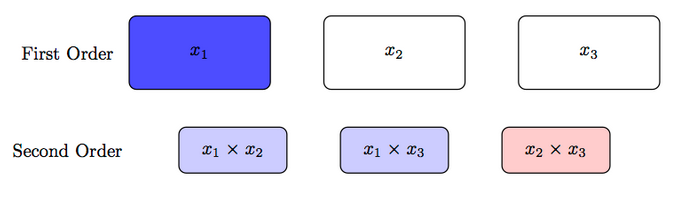

3. Feature interaction terms should be created **before** any preprocessing steps.

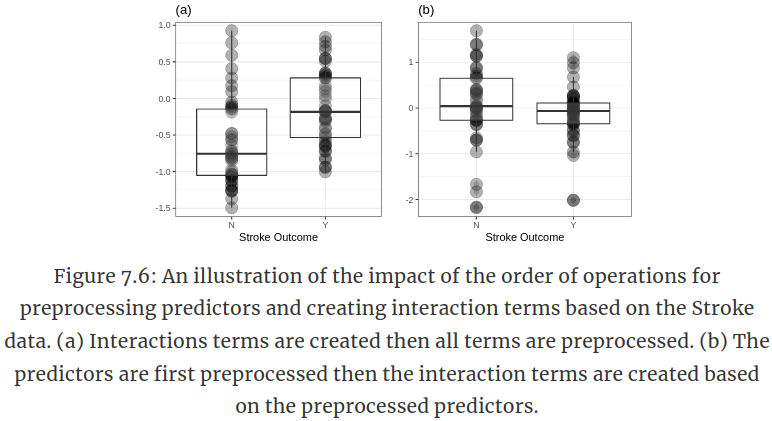

4. Feature interaction build tecniques:

- brute force - just build all possible feature combinations (N*(N-1)/2) and select the best using LASSO regression, works good with the small number of features
- two-staged method - at first select the most important features, than build and select the most important interactions of them
- use tree-based models to build the interactions between features that are met the most frequently in the decison tree splits
- use FSA algorithm (its description is written above), but randomly select 2 features and find the best interaction by replacing of one of them

## Validation

1. You should understand how train and test sets are generated. If they have different generation algorithms => they have different data balance => **you should validate only on the train set and don’t use the test set**.

2. When use **MAE** it’s better to aggregate data **by mode**, when use **MSE** - **by mean**.

3. Data can be splitted by:
    - **row** (one row - one object, random train/test split can be used);
    - **time** (e.g. need to predict sales for next day/week/month: **time series split** can be used);
    - **ID** (when id of objects are hidden and multiple rows in each dataset may belong to one object, need **prior clustering, then random train/test split can be used**).
    
4. Your validation scheme must mimic the train/test split of competition. E.g **validation set must resemble a competition test set**.

5. When submitting your results to competition it’s recommended to select the result with the **best LB score** and result **with the best validation score**. This should be done because distribution of the test set may be not similar to the train test set and then the result with the best LB score wins. But if it is similar to the train set, then the result with the best validation score is better. You can also consider submissions with **high LB score but low correlation with validation score** - maybe you were lucky and occasionally hit high LB score.

6. What to do if **validations on the dataset are differ**? 
    - increase number of K in K-fold (but 5-10 is usually enough)
    - use couple of different K-folds with different random seed
    - if use K-fold scheme - check model performance for each fold, maybe model over/underfits on some folds
    - tune model on one split, evaluate for another
    - if use train/val/test split, create K-fold scheme, select K value to make K-fold val size close to val/test size and select best split among these folds 
    
## Leaderbord

1. What to do if **LB score doesn’t match validation score**
    - check if we have too little data in the test LB
    - check if we overfitted
    - check if we chose correct splitting strategy
    - check if train/test have different distributions
    
2. **Leaderbord probing** types:
     - simply extracting all ground truth from public part of LB (read Alek Trott’s post);
    - find categories that definitely have the same target value and then try to guess this value;
    - lifehack for LB probing for binary classification, logloss and allegedly the same distribution for public and private parts:
    
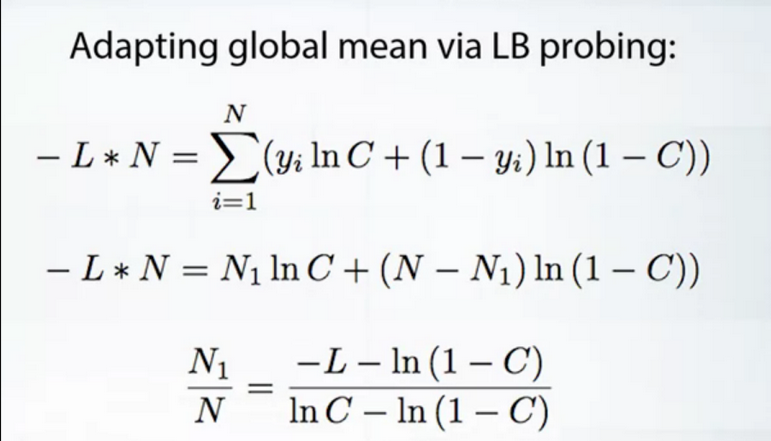
    where C is a constant in range [0, 1] in our probe prediction, L - leaderboard score, N - number of rows in the test set, N1 - real number of ones for target value in the test set; last equation helps us to find the real percent of ones in the test; so if we will rebalance our prediction to have the same percent of ones, we may significantly improve our score.
    
3. **Data leakage** can be obtained from:
    - features from test set, especially this works for time series (e.g. prices from next week, or number of cargo tracks; they definitely connected with number of sales for the next week)
    - meta data (e.g. resolution of photos with dogs and cat may be different, or maybe they were made with different cameras, that can be used to classify that photos almost perfectly)
    - ID’s, some information can be stored in ID’s (e.g. they may be hash of target value)
    - row order (e.g. duplicate rows may have the same target value)


## Metrics

1.  **Optimize MSE instead of RMSE**. It’s much more simple to calculate and minimizing of MSE leads to minimizing of RMSE. Or use **R squared (1 - MSE(pred)/MSE(constant))**.

2. Optimal **MSE** constant is **mean**, optimal **MAE** constant is **median**, optimal **Logloss** constant prediction is **probability of each class**.

3. **When to use MAE or MSE (RMSE, R^2) in the regression tasks?** 
    - if you have a lot of outliers in data and sure that they are outliers - use MAE, it’s more robust than MSE and better works with outliers
    - if you think that unusual objects are normal and they are not outliers - use MSE

4. **MSPE, MAPE and RMSLE** are sensitive to **relative errors**. **MSPE and MAPE** are sensitive to **small targets**, while **RMSLE** is less biased towards **small targets**.

5. If you need to optimize **MAE** loss you can also use Huber loss instead.

6. If you want to use **MSPE/MAPE** in your model, use **MSE/MAE** with option **‘sample_weights’**. But not every model accepts this function, so you can also can resample dataset with **df.sample(weights=sample_weights)** option and then use MSE/MAE. **You don’t need to do the same with the test set.** To make model’s score more stable, resample dataset multiple times.

7. To optimize **RMSLE**:
    - transform target on the train set: z = log(y + 1)
    - transform predictions back on the test set: y = exp(z) - 1

## Feature encoding

1. **Mean encoding** - powerful technique, which encodes each value of features by some statistic for corresponding target:
    - mean = ones/(ones + zeroes)
    - weight of evidence = ln(ones/zeroes)*100 (for binary target)
    - count = sum(target)
    - diff = ones - zeroes
    - std, percentiles, distribution bins, etc for regression
    - for time series we can count statistics for previous period: count, sum, cumsum, mean, median, etc.

2. Mean encoding regularization:
    - **CV (KFold scheme)** - may work poorly for small subset of data
    - **smoothing - (mean(target) \* n_rows + global_mean \* alpha) / (n_rows + alpha)** - if category is huge (n_rows is big number), then we can trust the estimated encoding, but if category is rare - we can’t and we return to smooth by **global mean** value; parameter **alpha** controls the regularization - if it’s zero - then we return to classic mean, if it’s infinity - then mean turns to global mean value. Usually alpha is equal to the category size we can trust
    - **add some noise** - this method is unstable - if we add too much noise - we turn feature to garbage, but if we add to little noise - quality of regularisation will become worse; this method is usually used together with LOO regularization
    - **expanding mean** - fix some order for category and use first N-1 rows to encode Nth row (e.g. cumsum/cumcount); requires no hyperparameter tuning, but leads to irregular encoding quality, it can be solved by averaging model on encodings calculated from different data permutations
    - best regularization methods are **CV loop** and **expanding mean** - they are robust enough and easy to tune

3. We can also use **mean encoding of feature interactions**. To do that we must define which features combinations are met most frequently in the decision tree splits and select that combinations. Two features interact in the tree if they are in the neighbouring nodes. So we iterate through the model and calculate how often each pair of features appeared. The most frequent interactions are probably worth encoding.
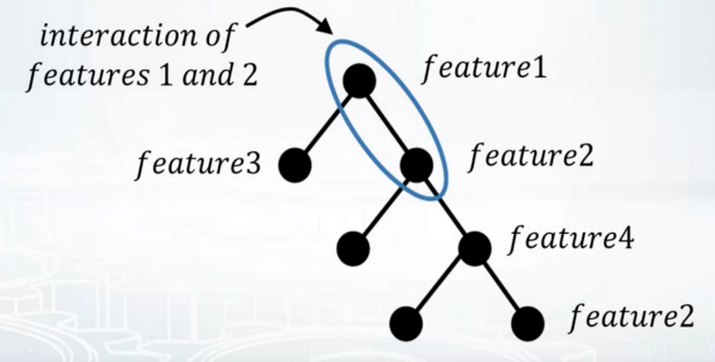

4. **Correct mean encoding validation order**:
Local experiments:
    - estimate encodings on X_tr
    - map them to X_tr and X_val
    - regularize on X_tr
    - validate model on X_tr and X_val split
        Submission:
estimate encodings on whole Train data
    - map them to train and test
    - regularize on train
    - fit on train

5. Mean encodings give significant improvement only on specific datasets. But if they give, this improvement is really worth it.

6. Encoding for ordered data. If categories of predictor is ordered, first try to find relations between them and target values. If these relations are linear, categories encoding should be linear, if these relations are quadratic - make them quadratic. But the complexity of encoding is constrained to one less than the number of categories in the original predictor. E.g. we could not explore a cubic relationship between a predictor and the response with a predictor that has only 3 categories. In practice there is no sense to explore the effectiveness of anything more than a quadratic relationship. Also it's good practice to make the encoded categories to sum up to zero:

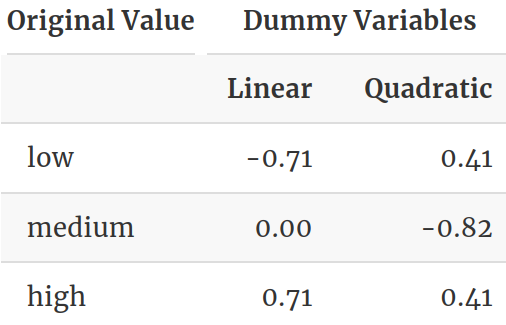

If can't find exact relationship between predictor and target - translate the ordered categories into a single set of numeric scores based on context-specific information. For example, when discussing failure modes of a computer hardware, experts would be able to rank the severity of a type of failure on an integer scale. A minor failure might be scored as a “1” while a catastrophic failure mode could be given a score of “10” and so on.

## Hyperparameters

1. XGBoost/LigthGBM/CatBoost hyperparameters
- **num_round/num_iterations** - how many trees we want to build; there is a nice trick to improve model score: for fixed learning rate find number of trees on which validation score is the best, then divide learning rate by some constant alpha and multiply number of trees on the same constant. That will let us find the best point more precisely
- **max_depth/max_depth or num_leaves** - max depth of decision tree. If increasing max depth of tree doesn’t lead to overfitting, that means that data has a lot of deep interaction in the data. So we have to stop tuning and try to create some additional features
- **bagging_fraction/subsample** - size of data batch to sample for next tree fitting  (if model is overfitting - try to decrease this parameter)
- **colsample_bytree or colsample_by_level/feature_fraction** - number of features to use for fitting next tree (if model is overfitting - try to decrease this parameter)
- **min_child_weight, lambda, alpha/min_data_in_leaf, lambda_l1, lambda_l2** - setting that tells algorithm to stop splitting when sample size in a node goes below a given threshold (for regression) or stop splitting when node reached certain degree of purity - **one of the most important hyperparameter for boosting models**, parameters could be different: 0, 1, 20, 300, etc. don’t hesitate to experiment with them
- **eta/learning_rate** - learning rate
- **seed/\*_seed** - there is no point in fixing random seed of the model because every hyperparameter change will lead to completely different model, but you can set and change it to be sure that seed changing doesn’t affect the model and it’s stable

2. Random Forest hyperparameters:
- **n_estimators** - number of trees
- **max_depth** - depth for each tree, can be set to None, which means unlimited tree depth, recommended depth is 7
- **max_features** - max number of feachers to use in each patch
- **min_sample_leaf** - similar to min_child_weight/min_data_in_leaf for XGBoost/LightGBM
- **criterion** - ‘gini’, ‘entropy’, 'chisq', 'mse'... gini is usually better and faster
- **n_samples_split** - mininum number of samples in node to split

3. Neural Nets. Watch **kaggle_tips/Models/NNs/NN_main_tips/NN_main_tips.ipynb**

4. Good practice is to average results from models with different random seeds and hyperparameters (**e.g. average LGBM model with optimal depth 5 by three LGBM models with max_depth 3, 4 and 5**).

5. More hyperparameter optimization info:

    - https://scikit-learn.org/stable/modules/grid_search.html

    - http://fastml.com/optimizing-hyperparams-with-hyperopt/

    - https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

6. If you **hunt for a medal** in the competition, look for competitions with a small number of entries in the leaderboard top and top teams that prematurely consist of one member.

7. Hyperparameter optimization preparation. Sort all parameters by these principles:
    - importance (from very important to not important at all);
    - feasibility (from easy to tune to not tunable at all (tuning may take a very long time))
    - understanding (from “I understand what this parameter is doing” to “I don’t understand at all”)

## Data

1. **Data loading**. You can do basic preprocessing of data (fill nans, remove wrong data, encode categorical values, etc.) and then save them to hdf5/npy (for numpy or pandas) file format for much faster loading. You can also preprocess and split train set on train and validation, save them to files and later use them to train you model.

2. By default data is stored in 64-bit arrays. Most of the time you can **safely downcast to 32-bit**.

3. Pandas support data reading **by chunks**. That can be used for memory saving.

4. Start with fastest models - e.g. LightGBM.

## Other

1. **Do not use cross-validation before the latest stages of your work**. On the first stages - train/test split is enough.

2. Switch to hyperparameter tuning and ensembling only when you are satisfied by feature engineering.

3. **Start competition from a simple baseline with a simple model** (e.g Random Forest), then switch to forums and discussion reading. After a week or so of lone work, explore the kernels of the other participants. Get some ideas from there, use them for your model or apply the ideas from your model to these kernels and then ensemble your models. **Never join the competition in the beginning.**

4. Try to create all possible features and then find the most useful among them.

5. **Use macros for frequently used code.**

6. **Modeling**:
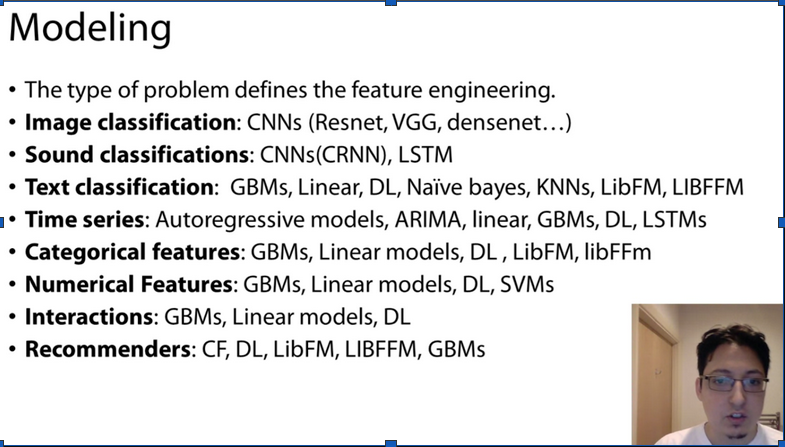

7. **Ensembling**. You should save all best test predictions (best on validation and best on LB) from your different models to combine them in the end. Combining can be made in different ways: from averaging to multilayer stacking. Small data requires simpler ensemble techniques (like averaging). For bigger data use stacking.

8. **Create github repository with useful methods and update it!**

9. **Matrix factorization** is decomposition of the MxN matrix to Mxd and dxN matrices which is often used for text processing, recommendation systems, rank tasks, etc. value d is usually in range from 5 to 100.

10. Use **PCA** and **NMF** methods for matrix factorization. NMF is more suitable for decision trees. You can also use PCA and NMF for logarithmic values.

11. Boosting can be **weight based** and **residual based**. 
- **weight based** models calculate which object has the bigger impact on the overall error and which object has smaller impact and assign their weights according to their impacts. There may be other methods of calculating weights, e.g. MAE + 1. Nevertheless, their purpose doesn't change, and the next model fits on this new weights and learns to build it’s own. Example of weight based models: AdaBoost and LogitBoost.
- **residual based** models calculate error of the previous model and use it for the next model as a new target feature. Residual based models also exclude some trees when fit, it’s some sort of regularization. Examples of residual based model XGBoost, LightGBM, CatBoost, H2OGBM, Sklearn GBM.

12. Stacking algorithm:
    - split dataset on the train, validation and test sets;
    - fit models M1, M2 and M3 (for example) on the train dataset;
    - predict targets on validation and test sets for each model;
    - fit new model on M1, M2 and M3 predictions for validation set to properly combine that predictions;
    - use this new model to predict the target for the test set.
It actually can have any number of stages.
Remember that your split must be the same for all models, but your models must be diversal. This diversity may come from:
- different algorithms
- different input features (e.g categorical feature for first model and OneHot encoding of that feature for the second model).
Meta model shouldn’t be too complicated.

13. Replacing missing counts values with **-1** is a good practice, because you can't estimate std for missing values and this will eventually give you -1. And normally -1 has a negative relationship with the target.

14. **Kaggle solutions:**
    - http://ndres.me/kaggle-past-solutions/
    - http://www.chioka.in/kaggle-competition-solutions/
    - https://github.com/ShuaiW/kaggle-classification/

15. If you see on the plot than your NN begin to overfit, **don't stop the process**, just let it to learn at least 10x of time when you saw overfitting first time. Very frequently it continues to train correctly after some period of overfitting (**double descent**).

16. If your train/val loss moves up and down, this is maybe because of unequal distribution of objects features/classes in your batches.
66. Probabilities of class from NN are not the real probabilities of objects belong to that class. You should calibrate these probabilities with **sklearn.CalibratedClassifierCV** for all models or **Calibrated Trees** for trees or **Softmax with temperature** (higher temperature - distribution of outer probabilities closer to uniform distribution, lower temperature - closer to trivial distribution with all mass concentrated on the highest-probability class) for NNs

17. Try **lightning.ai** or **wandb.ai** They simplify training, validation and inference of the models.

18. When finish you model, **try to clusterize test/val data and check model on each of these data**. Maybe this will help to find weak sides of your model or split your model on couple of models, and each of them will work better on it's own cluster.

19. Don't use 0 or 42 seed. **Use date YYYYMMDD as seed**, it will protect you from seed cherry picking.

20. Use **denoise**: col = np.floor(col * 100), this may help you to clear some noisy parts of features